<a href="https://colab.research.google.com/github/jajisan/EV_Market_segmentation/blob/main/EV_Segmentaion_geography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

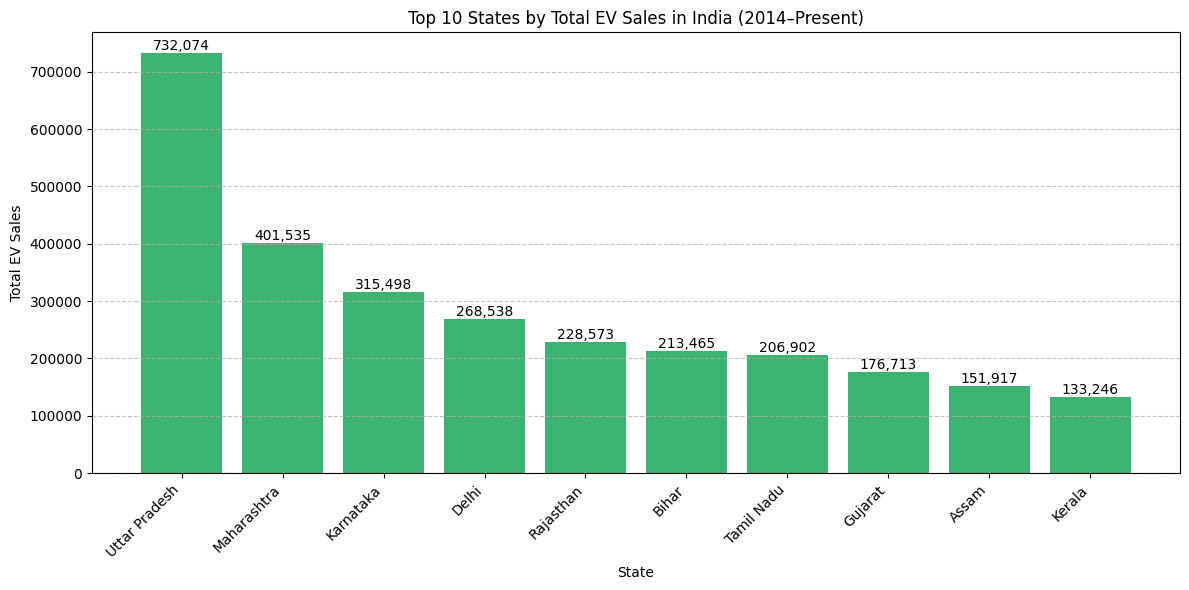

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/EV_Dataset.csv")
df = df[df['EV_Sales_Quantity'] > 0]

state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)
top_states = state_sales.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_states.index, top_states.values, color='mediumseagreen')
plt.title("Top 10 States by Total EV Sales in India (2014–Present)")
plt.xlabel("State")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height()):,}",
             ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


"/content/EV_Dataset.csv"

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/EV_Dataset.csv')

# Clean: Remove zero sales
df_cleaned = df[df['EV_Sales_Quantity'] > 0]

# Show structure and sample
print("Columns:", df_cleaned.columns.tolist())
print("\nSample:\n", df_cleaned.head())


Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

Sample:
        Year Month_Name      Date           State    Vehicle_Class  \
13   2014.0        jan  1/1/2014  Andhra Pradesh  M-CYCLE/SCOOTER   
102  2014.0        jan  1/1/2014    Chhattisgarh  M-CYCLE/SCOOTER   
153  2014.0        jan  1/1/2014           Delhi  M-CYCLE/SCOOTER   
157  2014.0        jan  1/1/2014           Delhi        MOTOR CAR   
173  2014.0        jan  1/1/2014             Goa        MOTOR CAR   

    Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
13        2-Wheelers  2W_Personal                1.0  
102       2-Wheelers  2W_Personal               10.0  
153       2-Wheelers  2W_Personal                2.0  
157       4-Wheelers  4W_Personal                5.0  
173       4-Wheelers  4W_Personal                1.0  


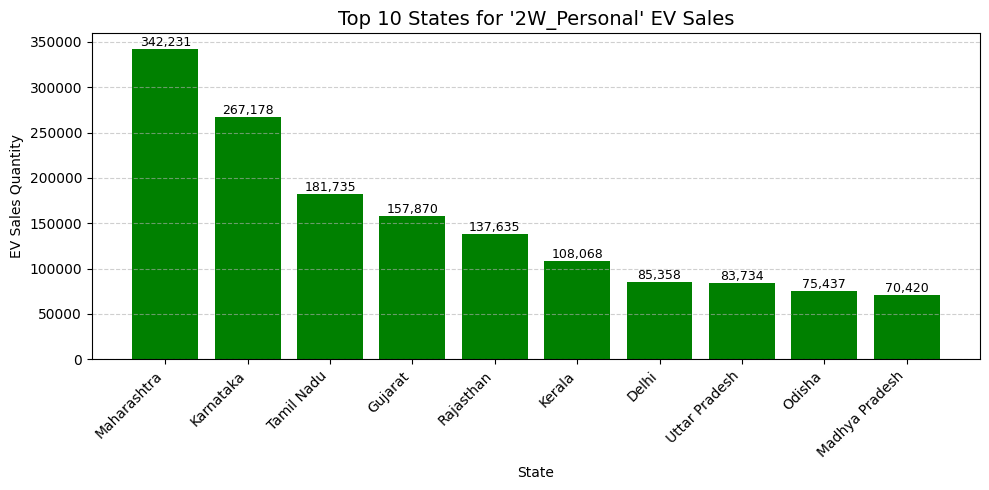

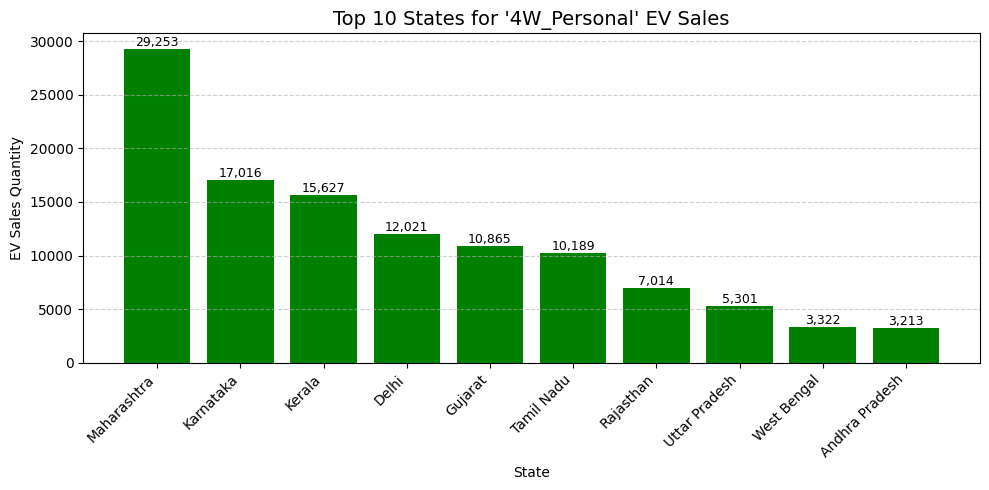

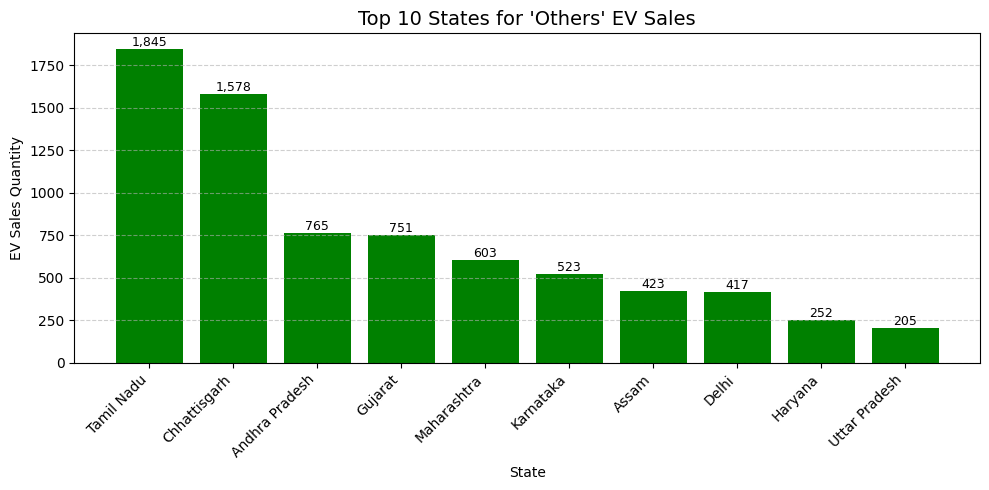

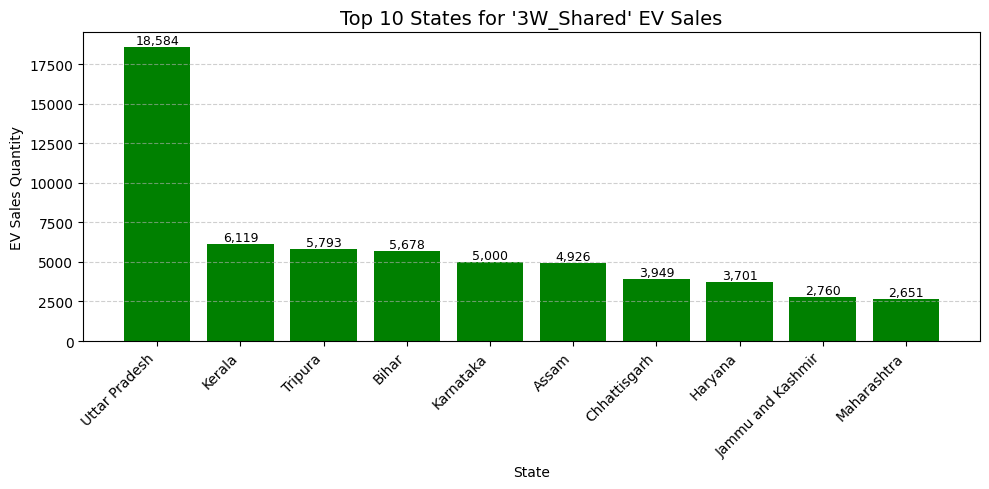

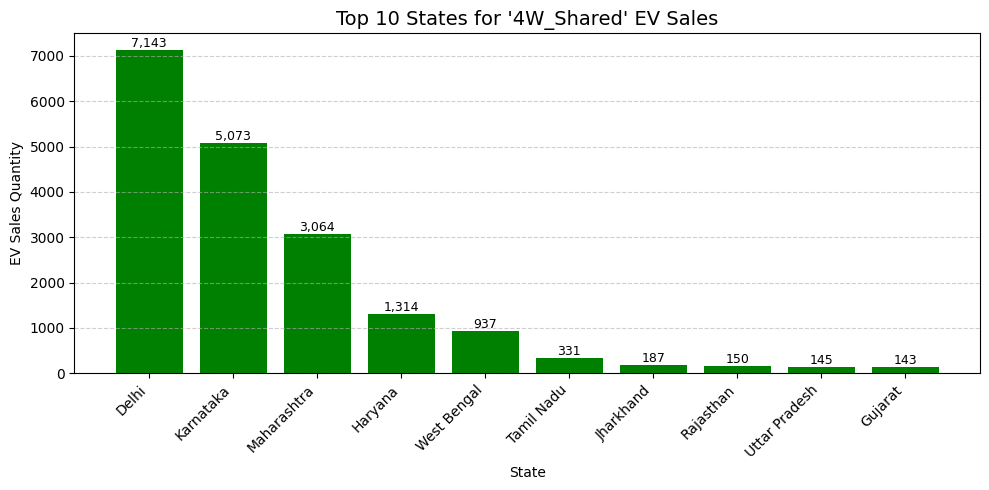

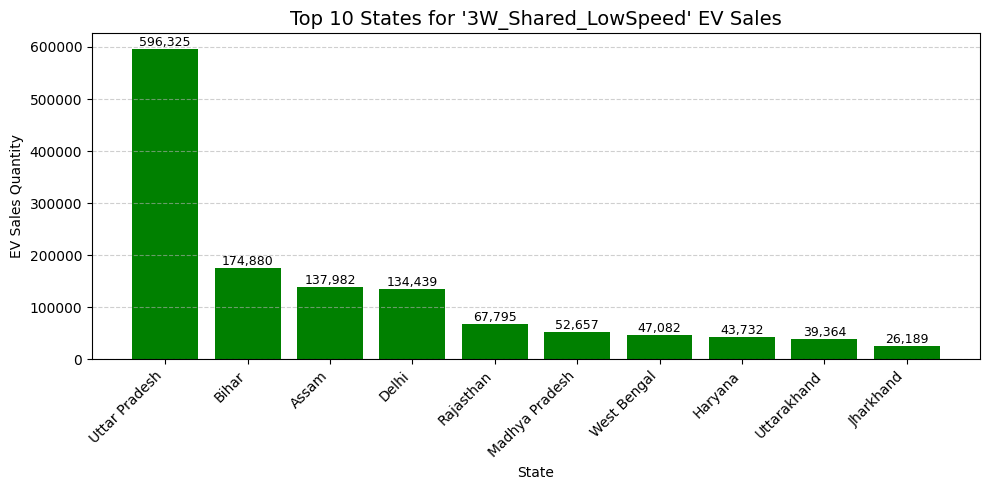

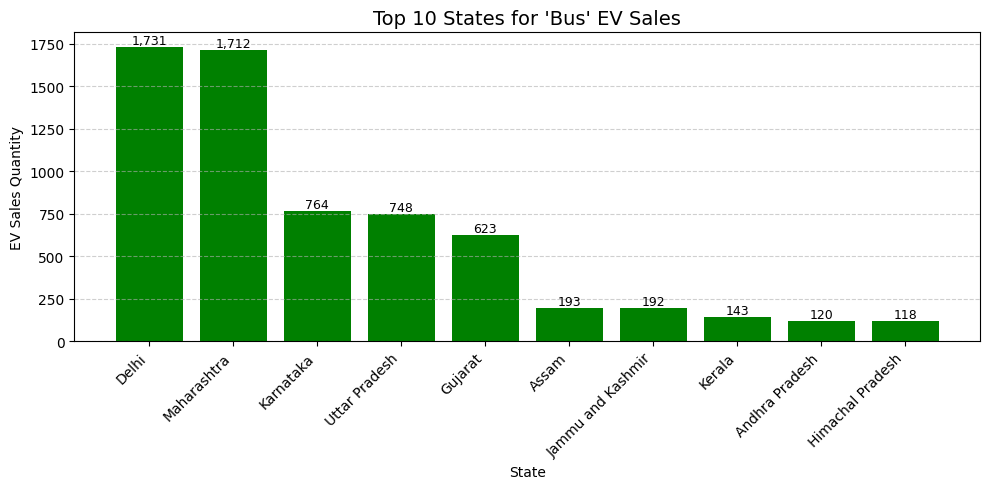

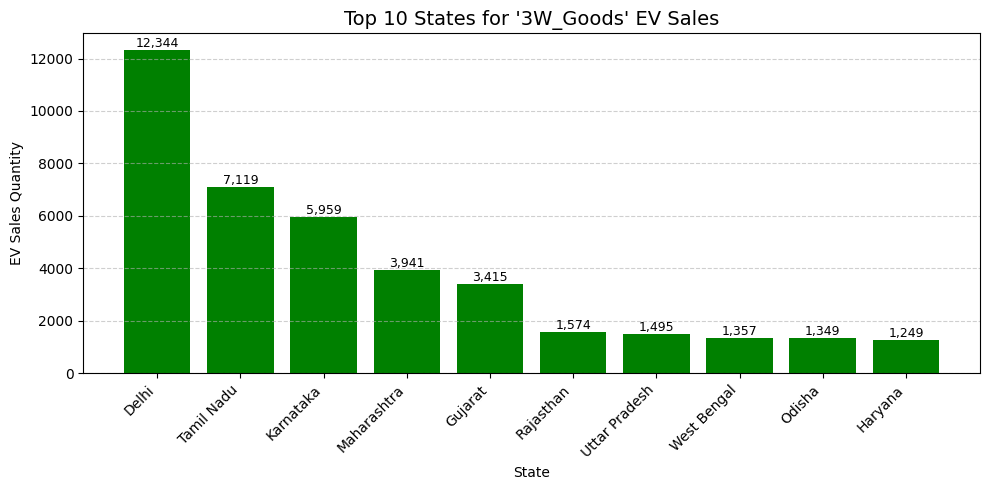

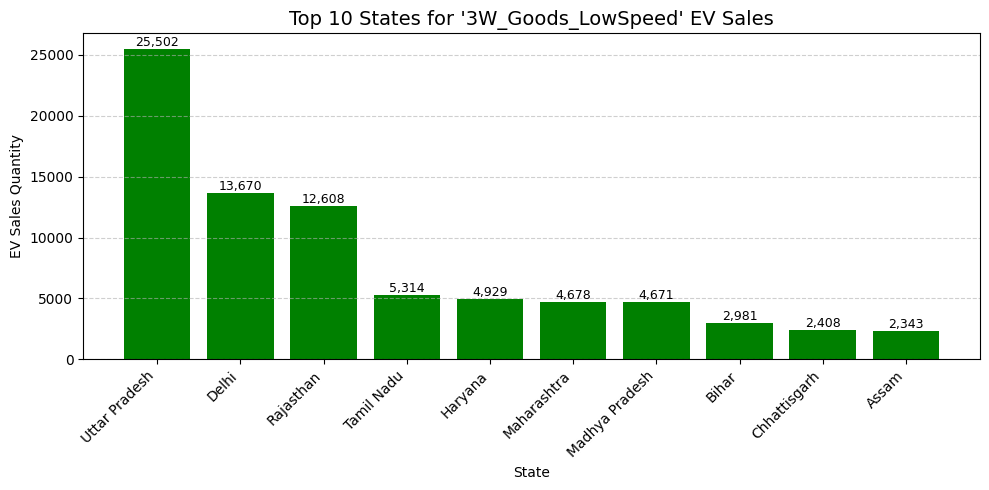

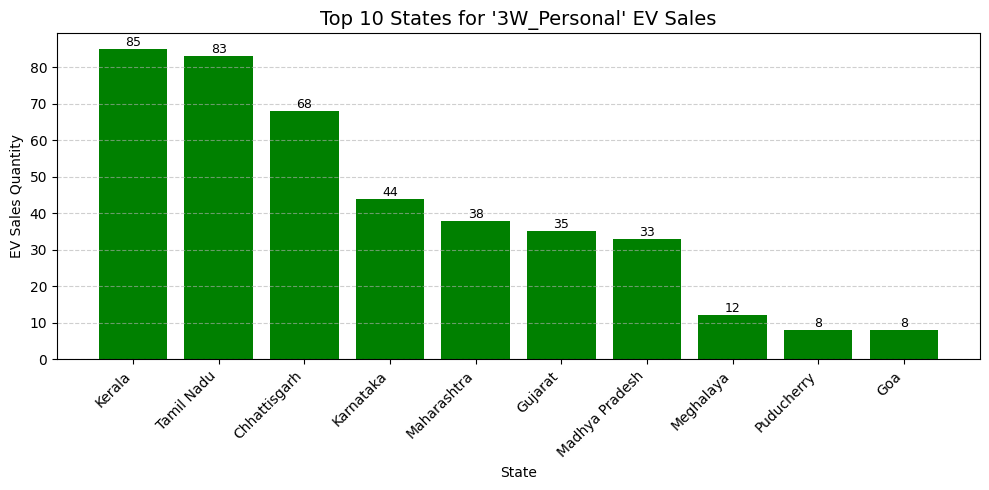

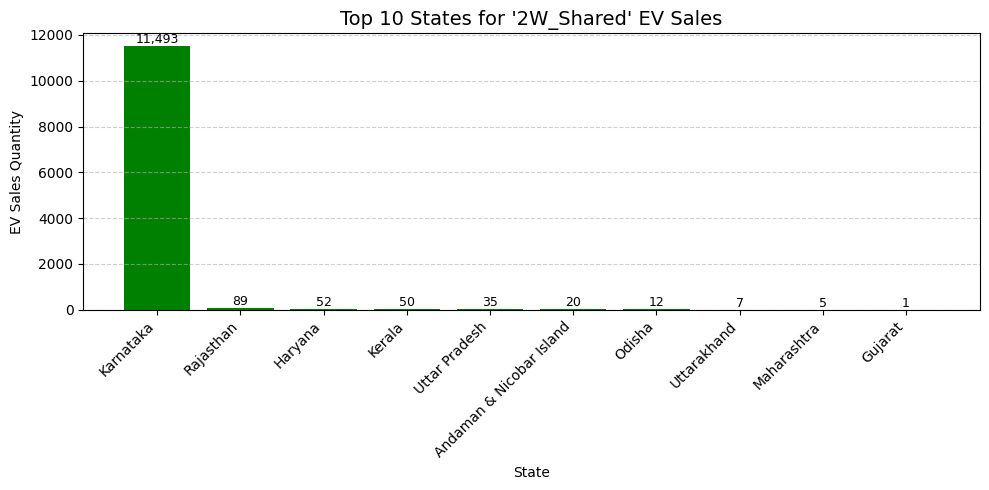

In [ ]:
import matplotlib.pyplot as plt

# Get all unique vehicle types
vehicle_types = df_cleaned['Vehicle_Type'].unique()

# Loop through each type and plot top 10 states
for v_type in vehicle_types:
    plt.figure(figsize=(10, 5))

    data = df_cleaned[df_cleaned['Vehicle_Type'] == v_type]
    state_sales = data.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

    bars = plt.bar(state_sales.index, state_sales.values, color='green')
    plt.title(f"Top 10 States for '{v_type}' EV Sales", fontsize=14)
    plt.xlabel("State")
    plt.ylabel("EV Sales Quantity")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Annotate bars
    for bar in bars:
        yval = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


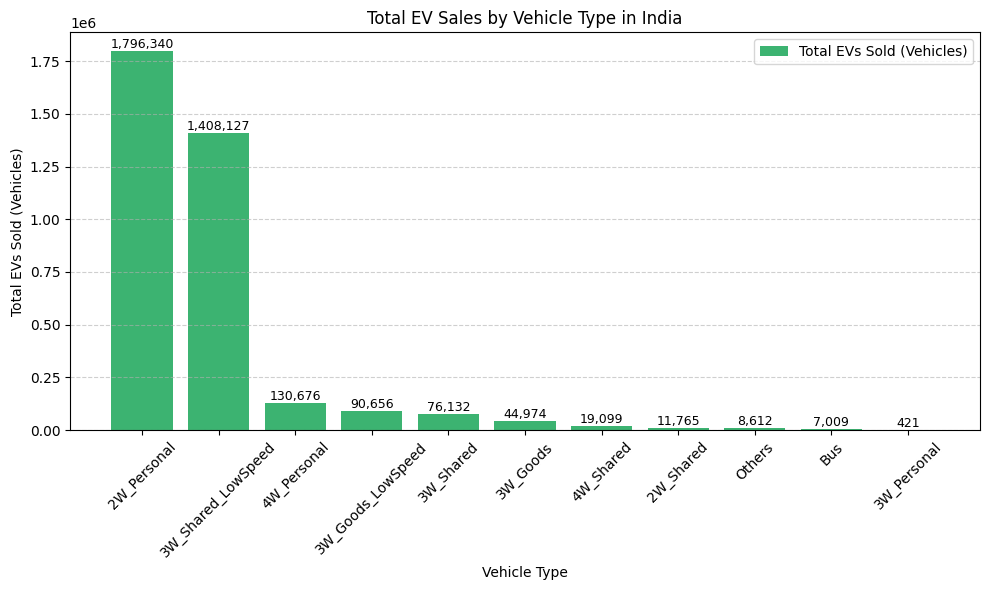

In [ ]:
import matplotlib.pyplot as plt

# Use previously grouped vehicle sales data
vehicle_sales = df_cleaned.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Plot with clear unit label
plt.figure(figsize=(10,6))
bars = plt.bar(vehicle_sales.index, vehicle_sales.values, color='mediumseagreen',
               label='Total EVs Sold (Vehicles)')

plt.title("Total EV Sales by Vehicle Type in India")
plt.xlabel("Vehicle Type")
plt.ylabel("Total EVs Sold (Vehicles)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", ha='center', va='bottom', fontsize=9)

plt.legend(title='', loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-525704274.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_cluster.reset_index(), x='State', y='Cluster', palette='Set2')


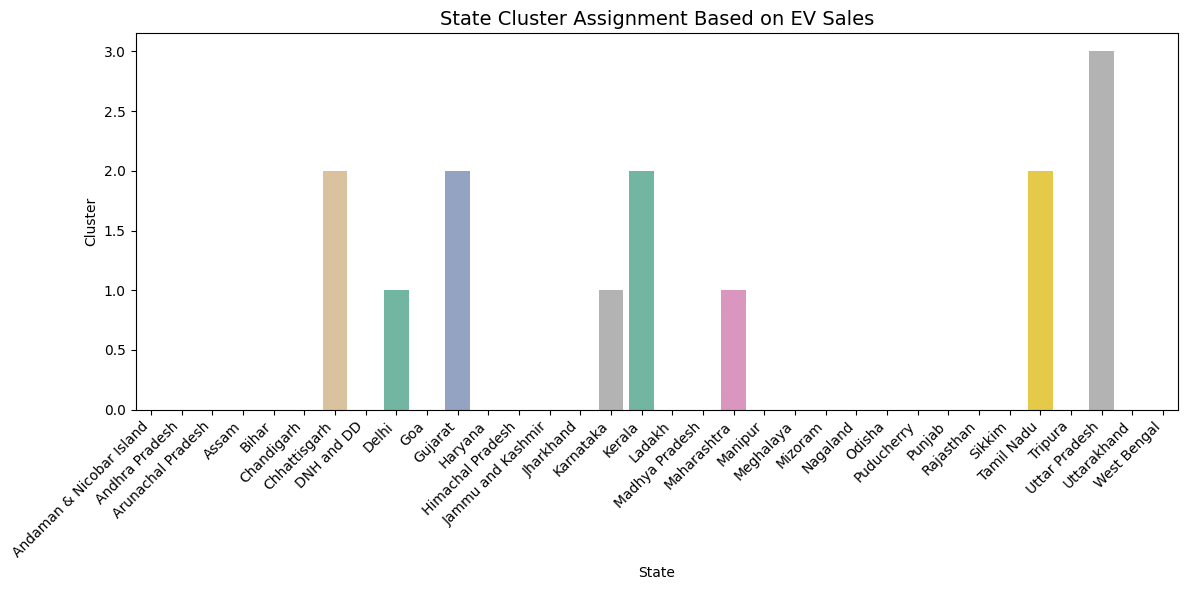


States in Each Cluster:

Vehicle_Type                     State  Cluster
0             Andaman & Nicobar Island        0
1                       Andhra Pradesh        0
2                    Arunachal Pradesh        0
3                                Assam        0
4                                Bihar        0
5                           Chandigarh        0
7                           DNH and DD        0
9                                  Goa        0
14                           Jharkhand        0
11                             Haryana        0
13                   Jammu and Kashmir        0
12                    Himachal Pradesh        0
20                             Manipur        0
21                           Meghalaya        0
18                      Madhya Pradesh        0
17                              Ladakh        0
28                              Sikkim        0
30                             Tripura        0
26                              Punjab        0
27            

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot: States vs Vehicle Types
pivot_cluster = df_cleaned.pivot_table(
    index='State',
    columns='Vehicle_Type',
    values='EV_Sales_Quantity',
    aggfunc='sum'
).fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_cluster)

# KMeans clustering (you can try 3-5 clusters for experiments)
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot state vs cluster
plt.figure(figsize=(12,6))
sns.barplot(data=pivot_cluster.reset_index(), x='State', y='Cluster', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("State Cluster Assignment Based on EV Sales", fontsize=14)
plt.tight_layout()
plt.show()

# Optional: see which states fall under which cluster
print("\nStates in Each Cluster:\n")
print(pivot_cluster.reset_index()[['State', 'Cluster']].sort_values(by='Cluster'))


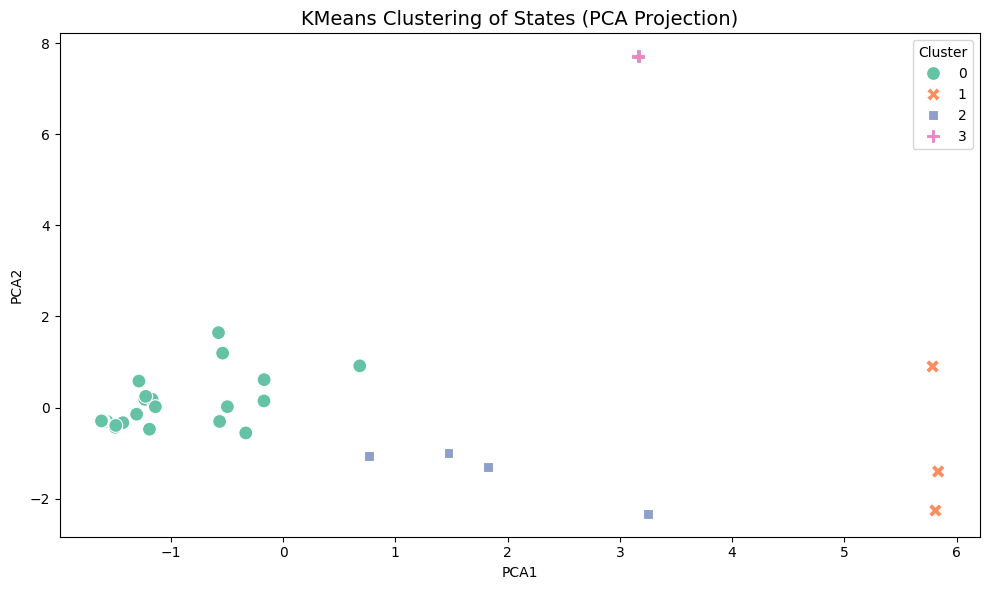

📊 State-wise Cluster Assignment:

                   State  Cluster
Andaman & Nicobar Island        0
          Andhra Pradesh        0
       Arunachal Pradesh        0
                   Assam        0
                   Bihar        0
              Chandigarh        0
              DNH and DD        0
                     Goa        0
               Jharkhand        0
                 Haryana        0
       Jammu and Kashmir        0
        Himachal Pradesh        0
                 Manipur        0
               Meghalaya        0
          Madhya Pradesh        0
                  Ladakh        0
                  Sikkim        0
                 Tripura        0
                  Punjab        0
               Rajasthan        0
                 Mizoram        0
                Nagaland        0
              Puducherry        0
                  Odisha        0
             West Bengal        0
             Uttarakhand        0
             Maharashtra        1
              

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# DataFrame with cluster assignments
cluster_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = pivot_cluster['Cluster'].values
cluster_df['State'] = pivot_cluster.index

# Plot without labels
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Cluster', style='Cluster', s=100, palette='Set2')
plt.title("KMeans Clustering of States (PCA Projection)", fontsize=14)
plt.tight_layout()
plt.show()

# Print clean cluster mapping
print("📊 State-wise Cluster Assignment:\n")
print(cluster_df[['State', 'Cluster']].sort_values(by='Cluster').to_string(index=False))


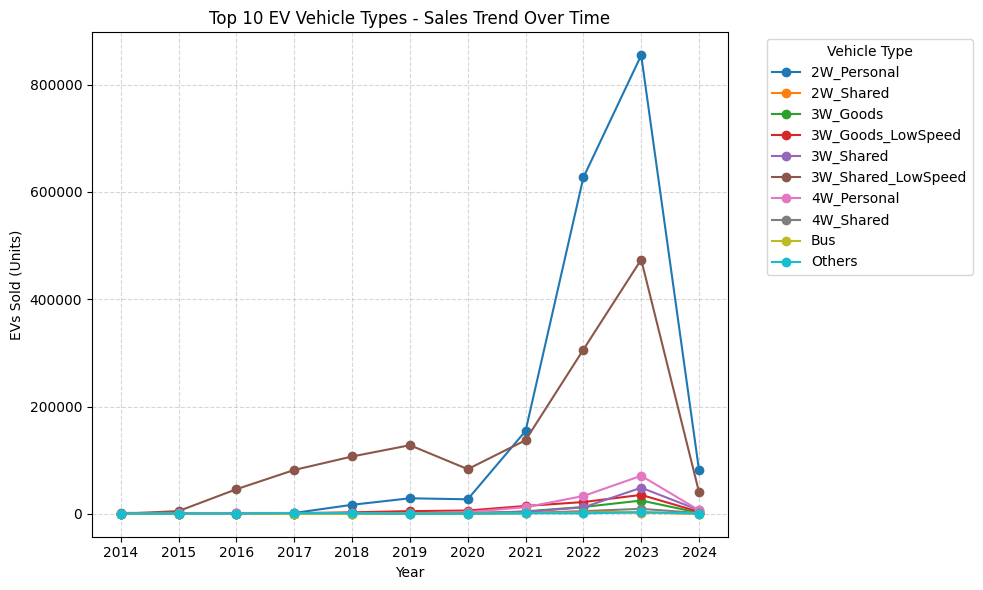

In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Top 10 vehicle types by total sales
top_types = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().nlargest(10).index

# Filter dataset
filtered_df = df[df['Vehicle_Type'].isin(top_types)]

# Group and pivot
trend_data = filtered_df.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack()

# Plot
plt.figure(figsize=(10,6))
for column in trend_data.columns:
    plt.plot(trend_data.index, trend_data[column], marker='o', label=column)

# Show every year
plt.xticks(trend_data.index)

plt.title("Top 10 EV Vehicle Types - Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("EVs Sold (Units)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

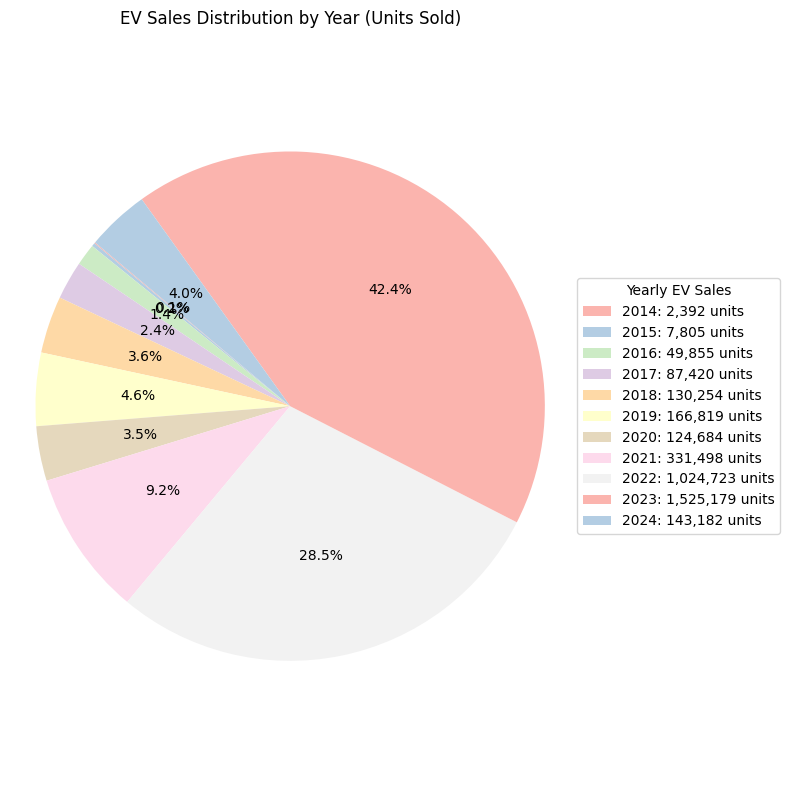

In [ ]:

# Group and round sales data
annual_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().astype(int)
years = annual_sales.index
sales = annual_sales.values

# Plot
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(
    sales, autopct='%1.1f%%', startangle=140,
    colors=plt.cm.Pastel1.colors, textprops={'fontsize': 10}
)

# Legend with integer values and commas
legend_labels = [f"{year}: {int(val):,} units" for year, val in zip(years, sales)]
plt.legend(patches, legend_labels, title="Yearly EV Sales", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("EV Sales Distribution by Year (Units Sold)")
plt.axis('equal')
plt.tight_layout()
plt.show()
